##### 선형회귀

In [1]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 전처리
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold

# 모형
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# 다항회귀
from sklearn.preprocessing import PolynomialFeatures

# 샘플데이터
from sklearn.datasets import fetch_california_housing

# 평가
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

##### 데이터 생성

In [33]:
np.random.seed(2022)
x = np.arange(50)
y = 3 * x + 2 + np.random.randn()

[k.shape for k in [x, y]]

[(50,), (50,)]

In [34]:
xy_pair = {}
for i, (j,k) in enumerate(zip(x, y)):
    xy_pair[i] = (j, np.round(k,2))
    
print(xy_pair)

{0: (0, 2.0), 1: (1, 5.0), 2: (2, 8.0), 3: (3, 11.0), 4: (4, 14.0), 5: (5, 17.0), 6: (6, 20.0), 7: (7, 23.0), 8: (8, 26.0), 9: (9, 29.0), 10: (10, 32.0), 11: (11, 35.0), 12: (12, 38.0), 13: (13, 41.0), 14: (14, 44.0), 15: (15, 47.0), 16: (16, 50.0), 17: (17, 53.0), 18: (18, 56.0), 19: (19, 59.0), 20: (20, 62.0), 21: (21, 65.0), 22: (22, 68.0), 23: (23, 71.0), 24: (24, 74.0), 25: (25, 77.0), 26: (26, 80.0), 27: (27, 83.0), 28: (28, 86.0), 29: (29, 89.0), 30: (30, 92.0), 31: (31, 95.0), 32: (32, 98.0), 33: (33, 101.0), 34: (34, 104.0), 35: (35, 107.0), 36: (36, 110.0), 37: (37, 113.0), 38: (38, 116.0), 39: (39, 119.0), 40: (40, 122.0), 41: (41, 125.0), 42: (42, 128.0), 43: (43, 131.0), 44: (44, 134.0), 45: (45, 137.0), 46: (46, 140.0), 47: (47, 143.0), 48: (48, 146.0), 49: (49, 149.0)}


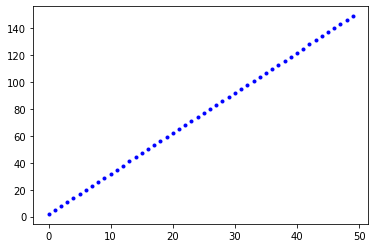

In [35]:
plt.plot(x, y, 'b.')
plt.show()


In [4]:
# 오차(Error)
# 추정된 a, b가 주어진 자료 x와 y를 얼마나 잘 설명하고 있는가?
# 손실(Loss), 비용(Cost)
# 추정된 값(Y_hat)과 실제값(Y)사이의 차이(오차, 잔차)는 작으면 작을수록 자료간의 관계를 잘 설명하고 있다고 판단

In [ ]:
# 오차에 대한 정의
# 1. LAD(Least Absolute Error) : 최소절대오차, L1 loss(L1 norm을 사용하기 때문), manhattan distance사용
# 2. LSE(Least Squared Error)  : 최소제곱오차. L2 loss(L2 norm을 사용하기 때문), euclidean distance사용

In [36]:
# 오차함수
def error(a, b):
    return np.mean(np.square(y - (a*x +b)))

# 기울기함수(편미분)
def grad_fa(a, b):
    return np.mean(-2 * x * (y-(a*x+b)))

# 기울기함수(편미분)
def grad_fb(a, b):
    return np.mean(-2 * (y-(a*x+b)))

In [37]:
beta0, beta1 = 0, 0

lr = 0.001
maxIter = 100
fval = []
beta0_list = []
beta1_list = []

for i in range(maxIter, 0, -1):
    fval.append(error(beta0, beta1))
    grad = np.array([grad_fa(beta0, beta1), grad_fb(beta0, beta1)])
    beta0 = beta0 - lr * grad[0]
    beta1 = beta1 - lr * grad[1]
    beta0_list.append(beta0)
    beta1_list.append(beta1)
    

In [38]:
print(beta0_list)

[4.948974132944787, 1.8880581446519633, 3.7811416459524794, 2.6102492062129645, 3.334380935420646, 2.886468057452316, 3.1634475895955068, 2.9920918313070137, 3.0980248938454578, 3.0324589156386823, 3.072962601412103, 3.0478637816416283, 3.0633391732325763, 3.0537200353076717, 3.0596215201518855, 3.0559237522439053, 3.0581630058526588, 3.0567303233832215, 3.057568704047928, 3.057002490057096, 3.057305021786949, 3.0570702715719524, 3.057167846871887, 3.057059908225008, 3.057079101430982, 3.0570196899329325, 3.0570089187587333, 3.0569680887138486, 3.056945874082306, 3.0569121705213322, 3.0568855971124647, 3.056854638214509, 3.056826416069949, 3.056796525663799, 3.0567676914206197, 3.0567382283112696, 3.056709178489004, 3.0566798973848033, 3.0566507836426218, 3.056621590694511, 3.056592471026617, 3.0565633303159947, 3.056534226887505, 3.0565051246555868, 3.056476045926147, 3.056446976890832, 3.0564179260774353, 3.056388888199178, 3.0563598665133966, 3.0563308589930256, 3.0563018668793296, 

In [39]:
print([np.round(x, 3) for x in beta0_list])

[4.949, 1.888, 3.781, 2.61, 3.334, 2.886, 3.163, 2.992, 3.098, 3.032, 3.073, 3.048, 3.063, 3.054, 3.06, 3.056, 3.058, 3.057, 3.058, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.057, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.056, 3.055, 3.055, 3.055, 3.055, 3.055, 3.055, 3.055, 3.055, 3.055, 3.055, 3.055, 3.055, 3.055, 3.055, 3.055, 3.055, 3.055, 3.055, 3.055, 3.055, 3.055, 3.055]


In [40]:
print([np.round(x, 3) for x in beta1_list])

[0.151, 0.059, 0.118, 0.083, 0.106, 0.093, 0.103, 0.099, 0.103, 0.102, 0.104, 0.104, 0.106, 0.106, 0.107, 0.108, 0.109, 0.11, 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117, 0.118, 0.119, 0.12, 0.121, 0.122, 0.123, 0.124, 0.125, 0.126, 0.127, 0.128, 0.129, 0.13, 0.131, 0.132, 0.133, 0.133, 0.134, 0.135, 0.136, 0.137, 0.138, 0.139, 0.14, 0.141, 0.142, 0.143, 0.144, 0.145, 0.146, 0.147, 0.148, 0.149, 0.15, 0.151, 0.152, 0.153, 0.154, 0.154, 0.155, 0.156, 0.157, 0.158, 0.159, 0.16, 0.161, 0.162, 0.163, 0.164, 0.165, 0.166, 0.167, 0.168, 0.169, 0.17, 0.171, 0.172, 0.172, 0.173, 0.174, 0.175, 0.176, 0.177, 0.178, 0.179, 0.18, 0.181, 0.182, 0.183, 0.184, 0.185, 0.186, 0.187, 0.187, 0.188]


In [21]:
print(fval)

[7295.106219477046, 1681112.075888889, 387629439.09085757, 89379504789.26607, 20609105395539.27, 4752042721944077.0, 1.0957249040064634e+18, 2.526519931556505e+20, 5.825643773553071e+22, 1.3432755844292716e+25, 3.0973217138941215e+27, 7.141797193787339e+29, 1.6467539335157443e+32, 3.7970813843727927e+34, 8.755301412135691e+36, 2.018795360374064e+39, 4.6549336398844746e+41, 1.0733335144832706e+44, 2.4748899177467096e+46, 5.7065954079642066e+48, 1.3158254400198756e+51, 3.0340272348502894e+53, 6.995852931430053e+55, 1.6131021394939273e+58, 3.7194871560971775e+60, 8.576384821305946e+62, 1.977540814532801e+65, 4.559809004171486e+67, 1.05139969813647e+70, 2.424314975101285e+72, 5.589979823008733e+74, 1.2889362456022973e+77, 2.972026192991055e+79, 6.852891073520414e+81, 1.5801380275950064e+84, 3.643478583658825e+86, 8.40112443201254e+88, 1.9371293147902042e+91, 4.466628262189231e+93, 1.0299141043533432e+96, 2.374773542999202e+98, 5.4757473042569036e+100, 1.2625965380349038e+103, 2.91129215663

In [40]:
print(beta0)

[nan nan]


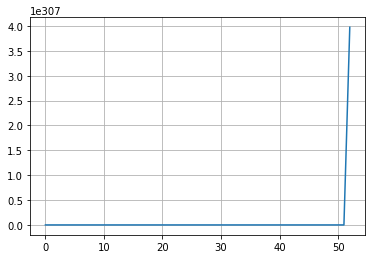

In [9]:
plt.plot(fval)
plt.grid()
plt.show()

In [12]:
beta0

array([-1.14285927e+291, -3.46431258e+289])

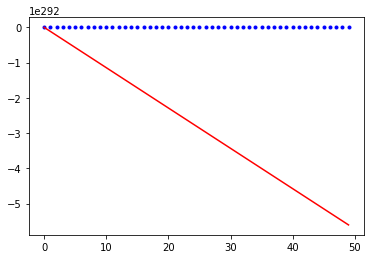

In [11]:
plt.plot(x, y, 'b.')
plt.plot(x, beta0[0]*x + beta0[1], 'r-')